In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
e_set_cgan = np.load('e_set_cgan.npy')*100
e_set_cvae = np.load('e_set_cvae.npy')*100
e_single_cgan = np.load('e_single_cgan.npy')*100
e_single_cvae = np.load('e_single_cvae.npy')*100
y_set_cgan = np.load('y_set_cgan.npy')*100
y_set_cvae = np.load('y_set_cvae.npy')*100
y_single_cgan = np.load('y_single_cgan.npy')*100
y_single_cvae = np.load('y_single_cvae.npy')*100

In [3]:
np.concatenate(([0],y_single_cvae))

array([ 0.        , 56.88      , 54.29411765, 50.66666667])

Earlier, this has been the slot for AIS. We have changed it to reconstruction attack which is not applicable to GANs

In [8]:
e_set_cgan[1] = 0
e_single_cgan[1] = 0

y_set_cgan[1] = 0
y_single_cgan[1] = 0

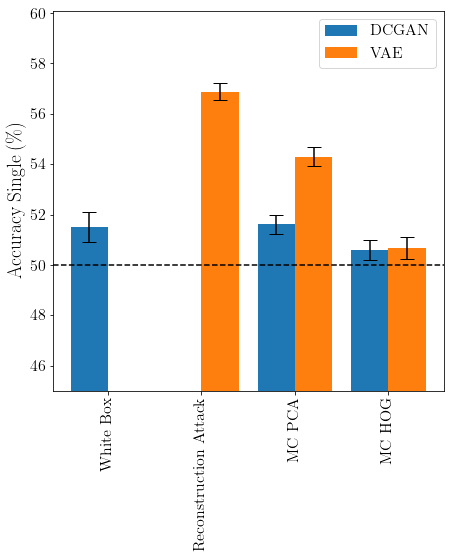

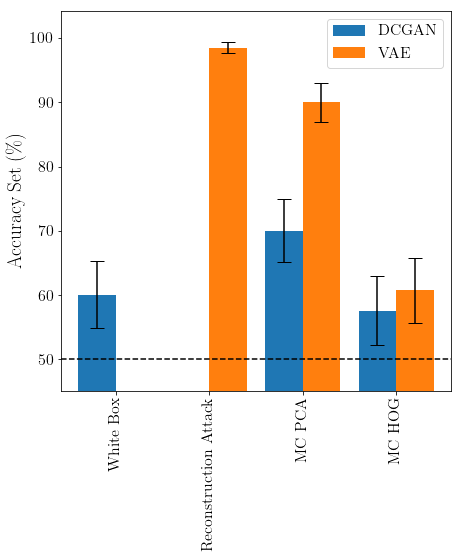

In [9]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rcParams.update({'font.size': 16})

f = plt.figure(figsize=(7, 7))
ax = plt.subplot()

names = ['White Box', 'Reconstruction Attack','MC PCA', 'MC HOG']
N = len(names)
ind = np.arange(N)

offset = 0.2
width = 0.4

rects1 = ax.bar(ind-offset,  y_single_cgan, width=width, label='DCGAN')
rects1 = ax.bar(ind+offset,  np.concatenate(([0],y_single_cvae)), width=width, label='VAE')

plt.errorbar(ind-offset, y_single_cgan, e_single_cgan, color='k', linestyle='None', capsize=7)
plt.errorbar(ind+offset, np.concatenate(([0],y_single_cvae)), np.concatenate(([0],e_single_cvae)), color='k', linestyle='None', capsize=7)


plt.ylim(ymin=45)
plt.axhline(y=50, color='k', linestyle='--')

plt.ylabel('Accuracy Single (\%)', fontsize='large')

ax.set_xticks(ind)
plt.setp(ax.get_xticklabels(), rotation='90')

ax.set_xticklabels(names)

plt.legend()
plt.savefig('Fashion_GAN_VAE_Single.pgf', bbox_inches="tight")

#############################################################################################################

f = plt.figure(figsize=(7, 7))
ax = plt.subplot()

names = ['White Box', 'Reconstruction Attack','MC PCA', 'MC HOG']
N = len(names)
ind = np.arange(N)

offset = 0.2
width = 0.4

rects1 = ax.bar(ind-offset,  y_set_cgan, width=width, label='DCGAN')
rects1 = ax.bar(ind+offset,  np.concatenate(([0],y_set_cvae)), width=width, label='VAE')

plt.errorbar(ind-offset, y_set_cgan, e_set_cgan, color='k', linestyle='None', capsize=7)
plt.errorbar(ind+offset, np.concatenate(([0],y_set_cvae)), np.concatenate(([0],e_set_cvae)), color='k', linestyle='None', capsize=7)


plt.ylim(ymin=45)
plt.axhline(y=50, color='k', linestyle='--')

plt.ylabel('Accuracy Set (\%)', fontsize='large')

ax.set_xticks(ind)
plt.setp(ax.get_xticklabels(), rotation='90')

ax.set_xticklabels(names)

plt.legend()
plt.savefig('Fashion_GAN_VAE_Set.pgf', bbox_inches="tight")

In [5]:
print(y_set_cgan)
print(y_set_cvae)

[60.         53.20512821 70.         57.53424658]
[98.5        90.         60.71428571]


In [10]:
print(y_single_cvae)
print(e_single_cvae)

print(y_set_cvae)
print(e_set_cvae)

[56.88       54.29411765 50.66666667]
[0.35284701 0.37789908 0.42489016]
[98.5        90.         60.71428571]
[0.85723304 2.99392475 5.08613618]
